# Simple Linear Regression_SELF

## Importing Needed Packages

In [156]:



#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import requests 
%matplotlib inline

## Downloading the Dataset
To download the data,I will be using requests. One can also use !wget to download it from IBM Object Storage.

In [157]:
url= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
page = requests.get(url)
open('FuelConsumption.csv','wb').write(page.content)

72629


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Ingesting the Data</h2>

In [158]:
df = pd.read_csv('FuelConsumption.csv')
#taking a look at Dataset
df.head(8)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [159]:
# Data Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [160]:
#Checking The Null Rows
df.isnull().any().any()

False

<h2 id='SELECTIVE FEATURES'> Let us explore more into some interesting features.</h2>

In [161]:
cdf = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [163]:
cdf.head(8)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244
5,6,3.5,10.0,230
6,6,3.5,10.1,232
7,6,3.7,11.1,255


### Plotting Histograms

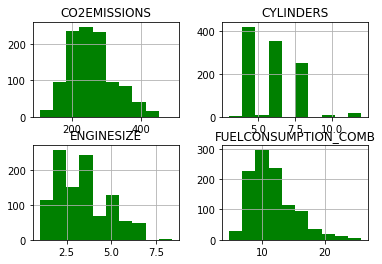

In [164]:
coem = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
coem.hist(color='g')
plt.show()

Correlation: 0.8497


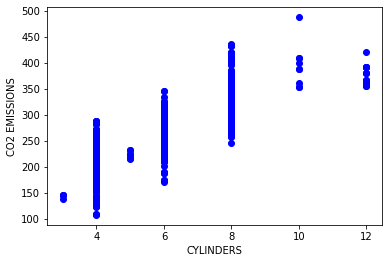

Correlation: 0.8742


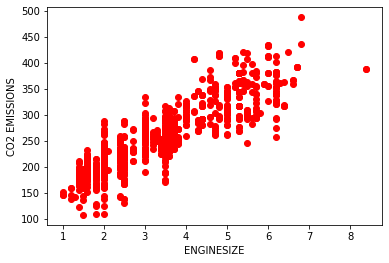

Correlation: 0.8921


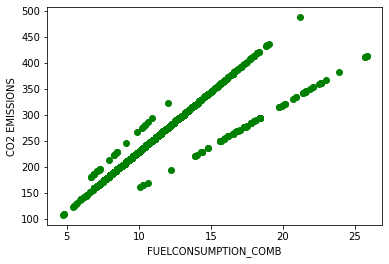

In [178]:
from scipy.stats import pearsonr as pcorr
# Lets plot each feature vs CO2EMISSIONS to understand the relationship
list = ['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']
l2=['blue','red','green']
target='CO2EMISSIONS'
for i in range(0,3):
    current = cdf[list[i]]
    print("Correlation: %.4f" %current.corr(cdf[target]))
    plt.scatter(current,cdf[target],color=l2[i])
    plt.xlabel(list[i])
    plt.ylabel('CO2 EMISSIONS')
    plt.show()
    

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

### One can go with
from sklearn.model_selection import train_test_split
X_train,Xtest,Y_train,Ytest = train_test_split(x,y,testsize=1/5,random_state=True)

In [149]:
mask=np.random.rand(len(df))<0.8
train=cdf[mask]
test=cdf[~mask]

### Train Data Distribution

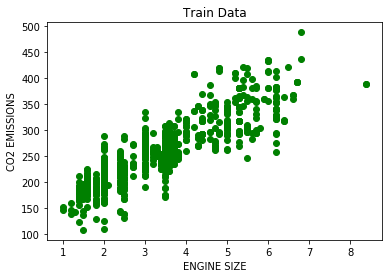

In [150]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='g')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.title('Train Data')
plt.show()

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

In [151]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
xtrain = np.asanyarray(train[['ENGINESIZE']])
ytrain = np.asanyarray(train[['CO2EMISSIONS']])
regressor.fit(xtrain,ytrain)
print(regressor.coef_)
print(regressor.intercept_)

[[38.99755086]]
[125.56127343]


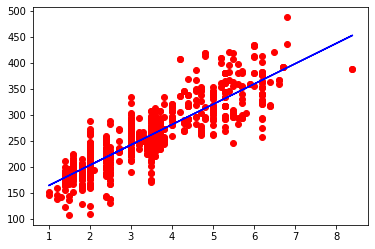

In [152]:
coeff = regressor.coef_
intercept = regressor.intercept_
plt.scatter(xtrain,ytrain,color='r')
plt.plot(xtrain,intercept + coeff*xtrain,color='b')
plt.show()

In [153]:
from sklearn.metrics import r2_score
xtest = np.asanyarray(test[['ENGINESIZE']])
ytest = np.asanyarray(test[['CO2EMISSIONS']])
ypred = regressor.predict(xtest)

#example of printing like this
#r1=33
#print("output style 1-> TEST: %.0f" % r1)
#print("output style 2-> TEST: {}".format(r1))

print("MAE: %.4f" % np.mean(np.absolute(ypred-ytest)) )
print("MSE: %.4f" %np.mean( (ypred-ytest)**2 ))
# FOR R2 SCORE GIVE PREDICTED VALUE FIRST
print("R2 SCORE %.4f" %r2_score(y_pred=ypred,y_true=ytest))


MAE: 23.6714
MSE: 915.7716
R2 SCORE 0.7831
